<a href="https://colab.research.google.com/github/claradilara/DataScienceProject1/blob/main/AIHUBPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Predictions with Melbourne Housing Dataset**

*Dilara Özdil*

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**Gathering and Observing Data¶**

In [23]:
# Load the dataset using read_csv()
dataset = pd.read_csv('/Melbourne_housing_FULL.csv')

# Observe the first 5 columns
first_5_columns = dataset.iloc[:, :5]
print(first_5_columns)


           Suburb             Address  Rooms Type      Price
0      Abbotsford       68 Studley St      2    h        NaN
1      Abbotsford        85 Turner St      2    h  1480000.0
2      Abbotsford     25 Bloomburg St      2    h  1035000.0
3      Abbotsford  18/659 Victoria St      3    u        NaN
4      Abbotsford        5 Charles St      3    h  1465000.0
...           ...                 ...    ...  ...        ...
34852  Yarraville         13 Burns St      4    h  1480000.0
34853  Yarraville       29A Murray St      2    h   888000.0
34854  Yarraville      147A Severn St      2    t   705000.0
34855  Yarraville    12/37 Stephen St      3    h  1140000.0
34856  Yarraville    3 Tarrengower St      2    h  1020000.0

[34857 rows x 5 columns]


In [24]:
shape = dataset.shape
num_columns = dataset.shape[1]
size = dataset.size

print(f"Shape of the dataset: {shape}")
print(f"Number of columns: {num_columns}")
print(f"Size of the dataset: {size}")

Shape of the dataset: (34857, 21)
Number of columns: 21
Size of the dataset: 731997


In [25]:
dataset_info = dataset.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**Exploratory Data Analysis**

In [26]:
descriptive_stats = dataset.describe()

# Print the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212     

In [27]:
# Identify object-type columns in the dataset
object_columns = dataset.select_dtypes(include=['object']).columns

# Convert object-type columns to categorical
dataset[object_columns] = dataset[object_columns].astype('category')

# Verify the data types after conversion
print(dataset.dtypes)

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date             category
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object


In [44]:
# Check for duplicate rows in the dataset
duplicate_rows = dataset.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

# Remove duplicate rows from the dataset
dataset_cleaned = dataset.drop_duplicates()

# Verify the shape of the cleaned dataset
print(f"Shape of the cleaned dataset: {dataset_cleaned.shape}")

Number of duplicate rows: 1
Shape of the cleaned dataset: (34856, 29)


In [29]:
# Calculate Z-scores for 'Landsize' and 'Buildingarea'
z_scores_landsize = zscore(dataset['Landsize'])
z_scores_buildingarea = zscore(dataset['BuildingArea'])

# Define a threshold for outliers (for example, 3 standard deviations)
threshold = 3

# Create boolean masks for outliers
outliers_mask_landsize = abs(z_scores_landsize) > threshold
outliers_mask_buildingarea = abs(z_scores_buildingarea) > threshold

# Filter dataset to remove outliers
dataset_cleaned = dataset[~(outliers_mask_landsize | outliers_mask_buildingarea)]

# Fill missing values in 'Bathroom' and 'Car' columns with the mode
dataset_cleaned['Bathroom'].fillna(dataset_cleaned['Bathroom'].mode()[0], inplace=True)
dataset_cleaned['Car'].fillna(dataset_cleaned['Car'].mode()[0], inplace=True)

# Verify the shape of the cleaned dataset
print(f"Shape of the cleaned dataset: {dataset_cleaned.shape}")

Shape of the cleaned dataset: (34857, 21)


In [52]:
# Check for missing values in 'Bathroom' and 'Car' columns
missing_cols = ['Bathroom', 'Car','Price','BuildingArea','YearBuilt']

# Fill missing values with the mode (most frequent value) of each column
dataset[missing_cols] = dataset[missing_cols].fillna(dataset[missing_cols].mode().iloc[0])

# Verify that missing values have been filled
print(dataset.isnull().sum())

Suburb                          0
Address                         0
Rooms                           0
Type                            0
Price                           0
Method                          0
SellerG                         0
Date                            0
Distance                        1
Postcode                        1
Bedroom2                     8217
Bathroom                        0
Car                             0
Landsize                    11810
BuildingArea                    0
YearBuilt                       0
CouncilArea                     3
Lattitude                    7976
Longtitude                   7976
Regionname                      3
Propertycount                   3
Suburb_LabelEncoded             0
Address_LabelEncoded            0
Type_LabelEncoded               0
Method_LabelEncoded             0
SellerG_LabelEncoded            0
Date_LabelEncoded               0
CouncilArea_LabelEncoded        0
Regionname_LabelEncoded         0
dtype: int64


**Data Visualization**

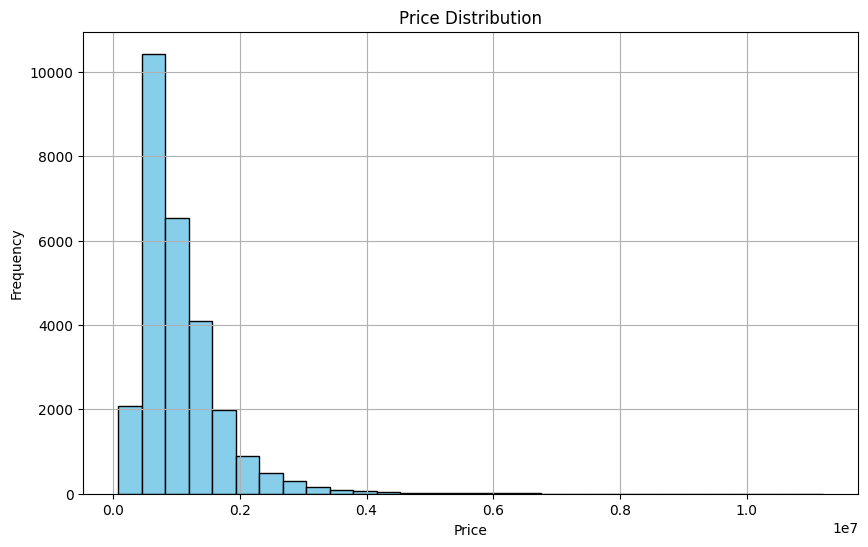

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

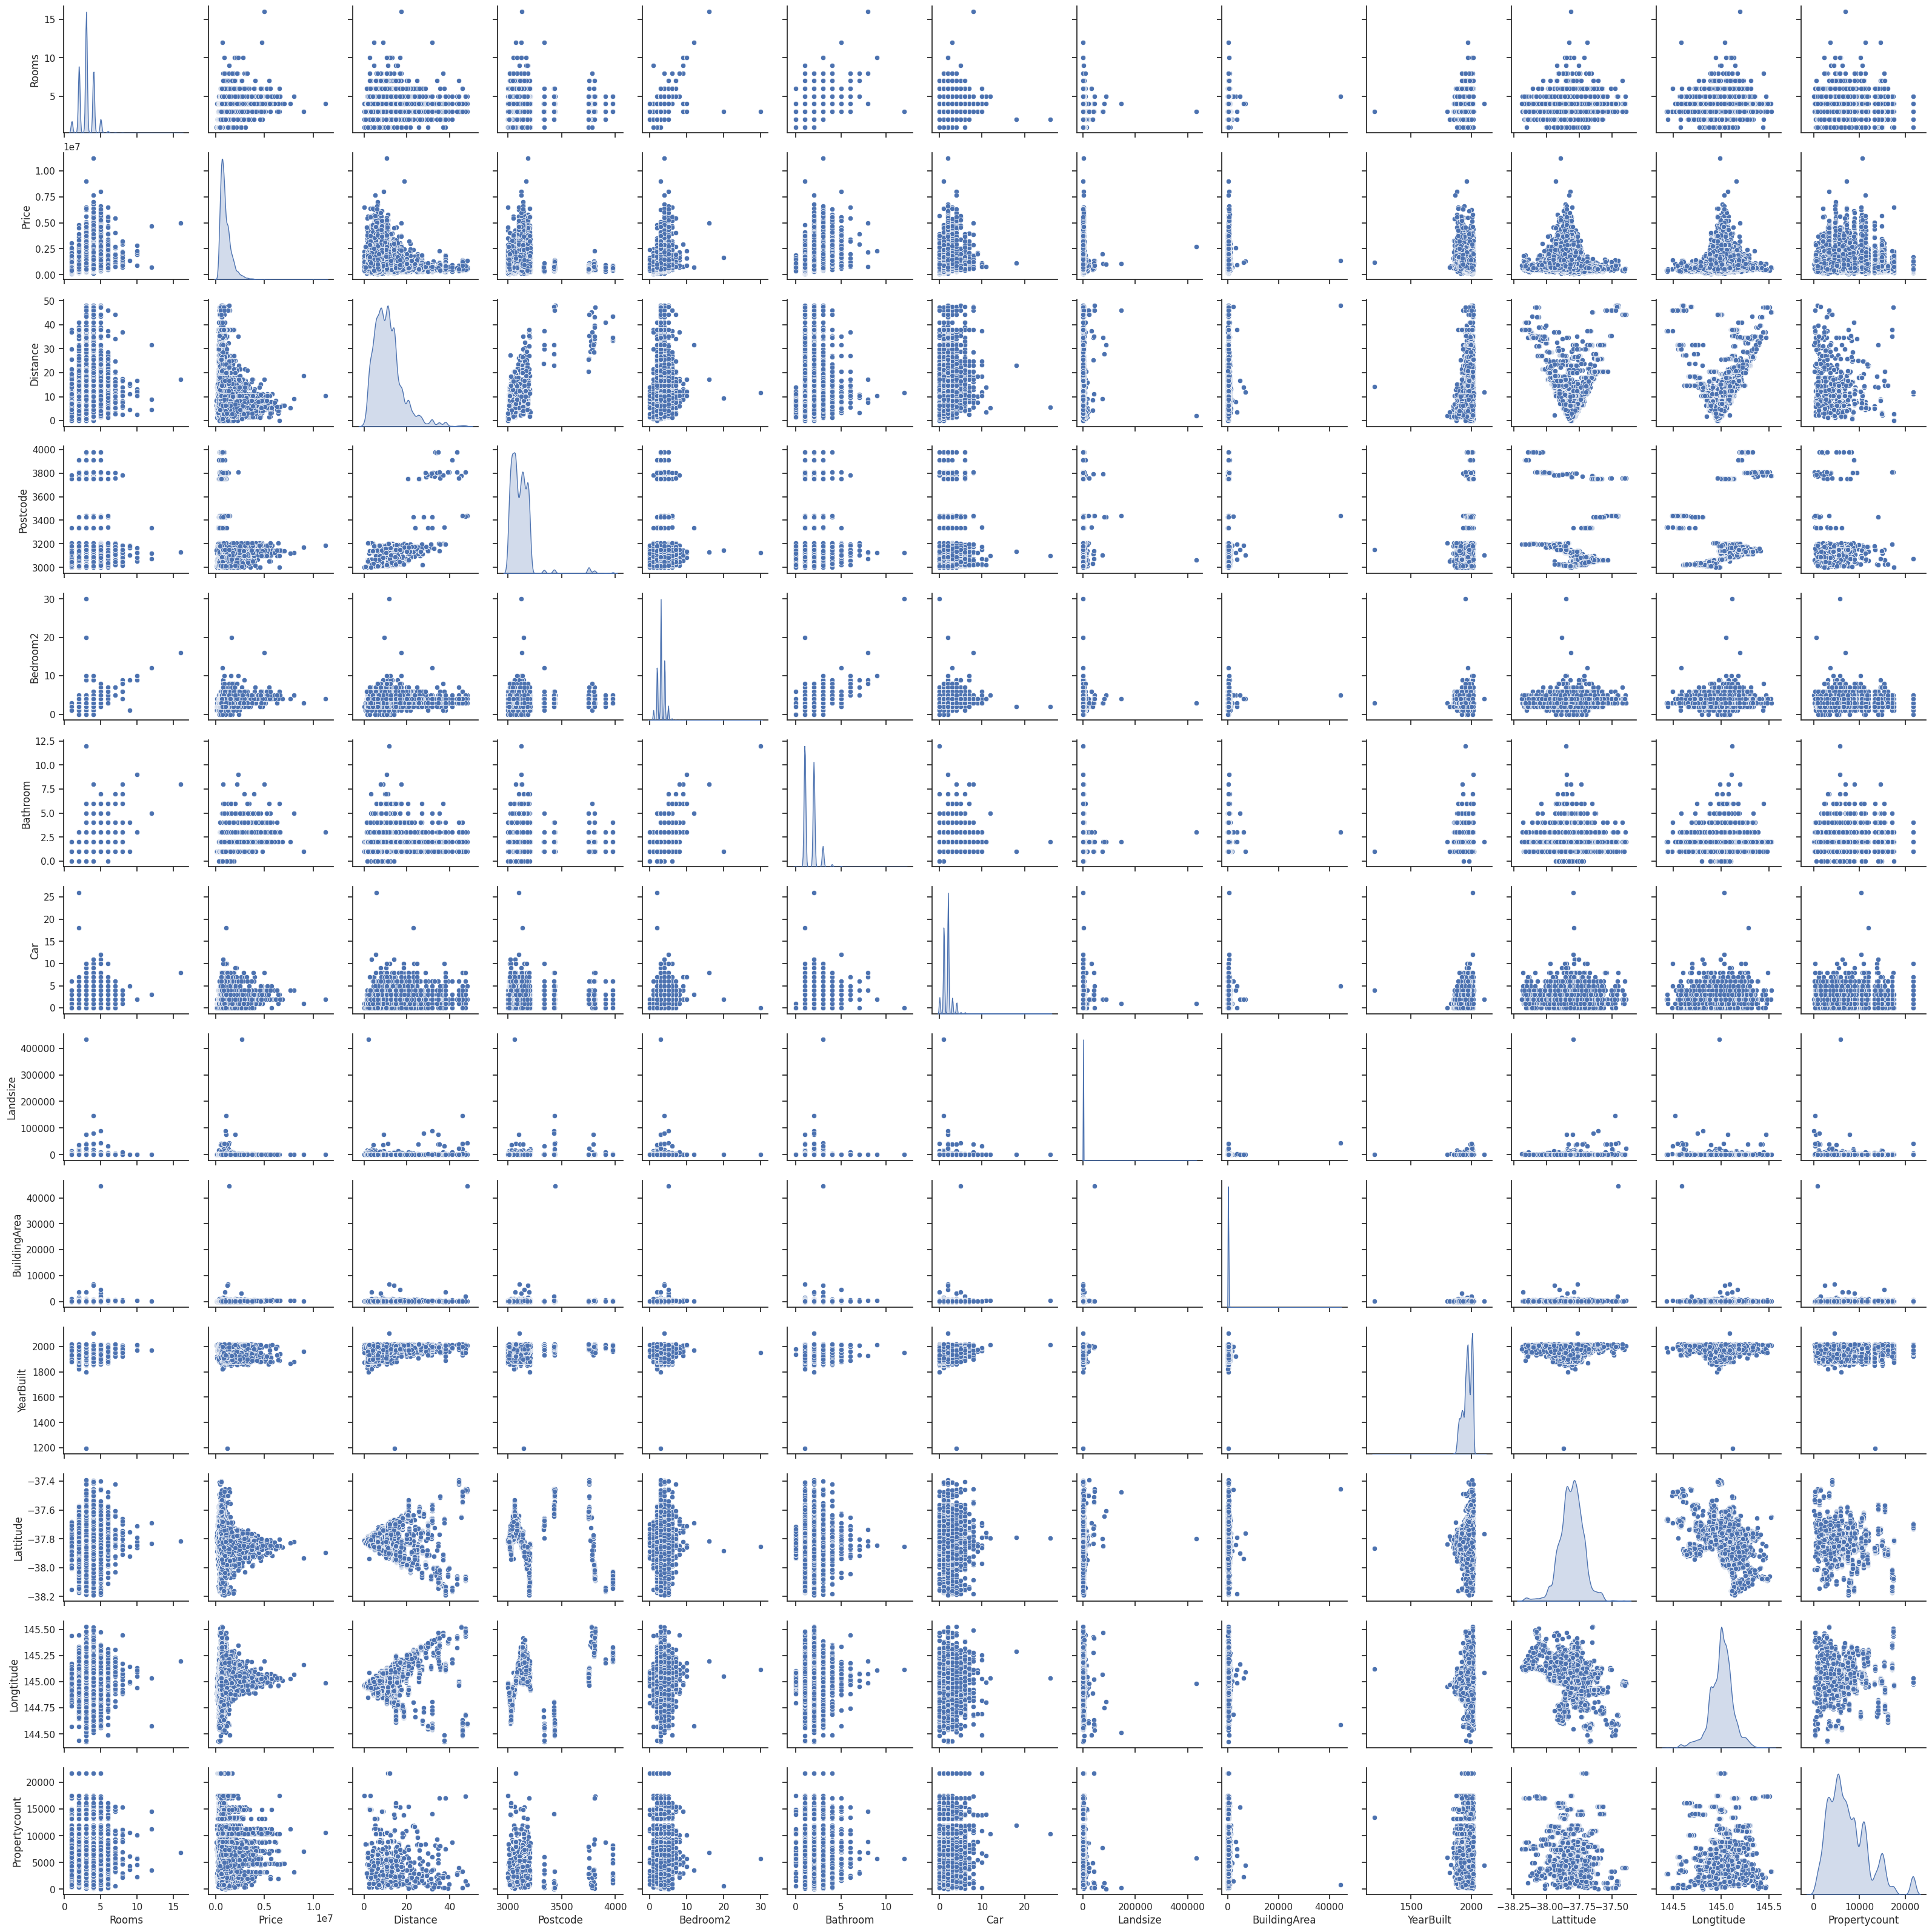

In [ ]:
# Select numerical columns for the pair plot
numerical_columns = dataset.select_dtypes(include=['number'])

# Add 'Price' column to the selected numerical columns
numerical_columns['Price'] = dataset['Price']

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(numerical_columns, diag_kind='kde', height=2.5)
plt.show()

<ipython-input-13-c7b23580fa68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


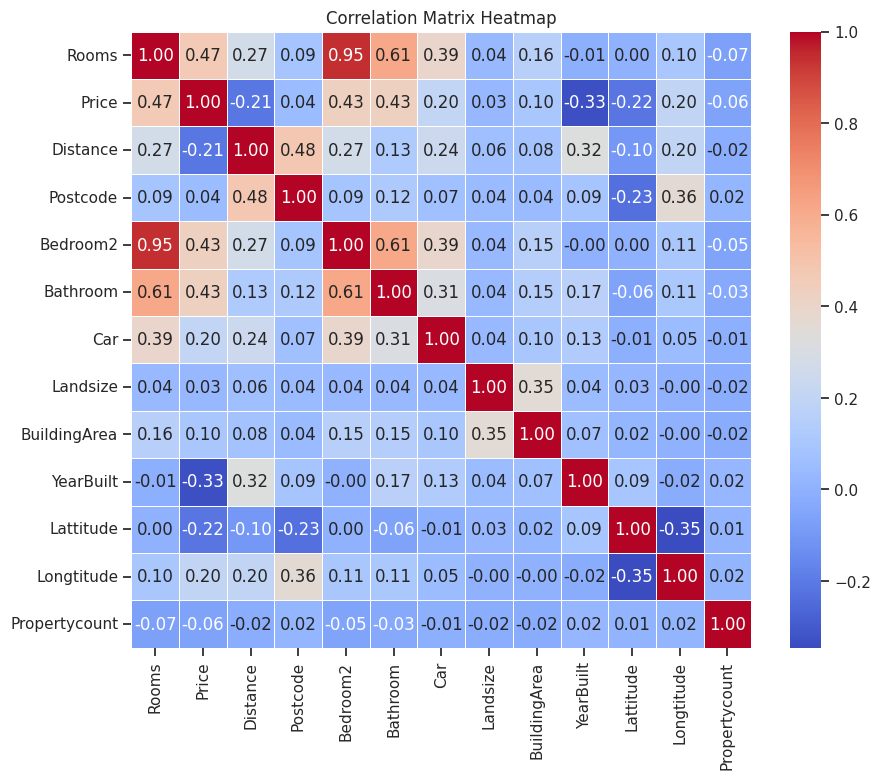

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    dataset[col + '_LabelEncoded'] = label_encoder.fit_transform(dataset[col])

# Print the updated dataset with Label Encoded columns
print(dataset)


           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h   600000.0     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u   600000.0     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  \
0             Jellis   3/09/2016       2.5    3067.0  ...   
1             Biggin   3/

In [54]:
dataset_encoded = pd.get_dummies(dataset, columns=categorical_cols, prefix=categorical_cols)

# Print the updated dataset with one-hot encoded columns

print(dataset_encoded)


       Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2   600000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
2          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
3          3   600000.0       2.5    3067.0       3.0       2.0  1.0   
4          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
...      ...        ...       ...       ...       ...       ...  ...   
34852      4  1480000.0       6.3    3013.0       4.0       1.0  3.0   
34853      2   888000.0       6.3    3013.0       2.0       2.0  1.0   
34854      2   705000.0       6.3    3013.0       2.0       1.0  2.0   
34855      3  1140000.0       6.3    3013.0       NaN       1.0  2.0   
34856      2  1020000.0       6.3    3013.0       2.0       1.0  0.0   

       Landsize  BuildingArea  YearBuilt  ...  CouncilArea_Yarra City Council  \
0         126.0         120.0     1970.0  ...         

**Model Selection**

In [55]:
correlation_matrix = dataset.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))

Price                       1.000000
Rooms                       0.361214
Bedroom2                    0.324880
Bathroom                    0.298666
Longtitude                  0.138948
Car                         0.127382
Regionname_LabelEncoded     0.065461
BuildingArea                0.061452
Landsize                    0.030106
Address_LabelEncoded        0.028999
Postcode                    0.026236
Date_LabelEncoded          -0.011875
Method_LabelEncoded        -0.025532
SellerG_LabelEncoded       -0.027030
Propertycount              -0.051112
CouncilArea_LabelEncoded   -0.090004
Suburb_LabelEncoded        -0.109320
Lattitude                  -0.157020
Distance                   -0.169266
YearBuilt                  -0.178842
Type_LabelEncoded          -0.300840
Name: Price, dtype: float64


<ipython-input-55-a4aef44832a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


Heatmapde ve correlation matrix değerlerinde de görüldüğü gibi ücrete en çok etki eden üç faktör:

*   Rooms
*   Bedroom2
*   Bathroom  

In [56]:
from sklearn.model_selection import train_test_split

# features as X and target as y are ready
X = dataset[['Rooms','Bedroom2' ,'Bathroom']]

# y: Target variable (Price)
y = dataset['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# To clean NaN data in the X dataset
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test are your features
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [63]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


# Define the models
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# Train and evaluate the models
for model_name, model_config in models.items():
    model = model_config['model']
    model.fit(X_train_imputed, y_train)  # Training the model
    score = model.score(X_test_imputed, y_test)  # Evaluating the model
    print(f"{model_name} Model Score: {score}")

Lasso Model Score: 0.1256874527134465
LinearRegression Model Score: 0.12568735549886223
Ridge Model Score: 0.1256881970879279
ElasticNet Model Score: 0.11615752047688999
KNeighborsRegressor Model Score: -0.12268788867045943
RandomForestRegressor Model Score: 0.13199995845769452
GradientBoostingRegressor Model Score: 0.13260278854196694
AdaBoostRegressor Model Score: 0.0826000580523868


**Model Evaluation**

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have trained models and made predictions on the test data

# Dictionary to store evaluation metrics for each model
metrics = {}

for model_name, model_config in models.items():
    model = model_config['model']
    predictions = model.predict(X_test_imputed)  # Make predictions using the test data

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    r2 = r2_score(y_test, predictions)

    # Store metrics in the dictionary
    metrics[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the evaluation metrics for each model
for model_name, metric_values in metrics.items():
    print(f"{model_name} Metrics: MAE={metric_values['MAE']}, MSE={metric_values['MSE']}, RMSE={metric_values['RMSE']}, R2={metric_values['R2']}")

# Find the best-performing model based on the metrics
best_model = min(metrics, key=lambda x: metrics[x]['RMSE'])
print(f"Best Performing Model: {best_model}")

Lasso Metrics: MAE=371764.6500752866, MSE=286530170878.9786, RMSE=535285.13044823, R2=0.1256874527134465
LinearRegression Metrics: MAE=371764.62134776893, MSE=286530202738.1936, RMSE=535285.1602073362, R2=0.12568735549886223
Ridge Metrics: MAE=371764.78579081286, MSE=286529926932.17944, RMSE=535284.902581961, R2=0.1256881970879279
ElasticNet Metrics: MAE=377545.3179461703, MSE=289653325316.91974, RMSE=538194.5050972926, R2=0.11615752047688999
KNeighborsRegressor Metrics: MAE=385899.0139414802, MSE=367927869253.231, RMSE=606570.5806031405, R2=-0.12268788867045943
RandomForestRegressor Metrics: MAE=369659.4639818416, MSE=284461433154.4802, RMSE=533349.2600111865, R2=0.13199995845769452
GradientBoostingRegressor Metrics: MAE=369906.6651459286, MSE=284263873360.1097, RMSE=533164.0210667911, R2=0.13260278854196694
AdaBoostRegressor Metrics: MAE=395679.96690380696, MSE=300650794668.8109, RMSE=548316.3271951793, R2=0.0826000580523868
Best Performing Model: GradientBoostingRegressor


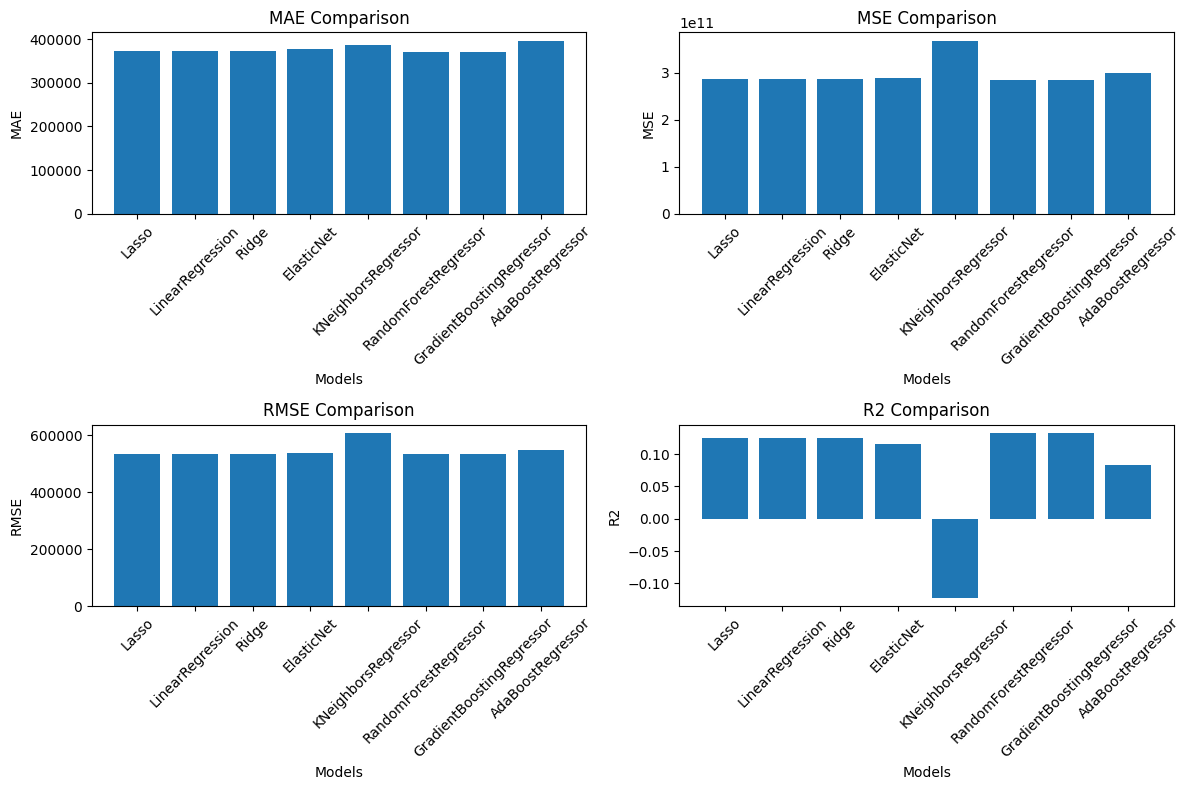

In [68]:
metrics_names = ['MAE', 'MSE', 'RMSE', 'R2']
models = list(metrics.keys())
metrics_values = np.array([[metric[metric_name] for metric_name in metrics_names] for metric in metrics.values()])

# Plotting individual bar charts for each metric
plt.figure(figsize=(12, 8))

for i, metric_name in enumerate(metrics_names):
    plt.subplot(2, 2, i + 1)
    plt.bar(models, metrics_values[:, i])
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()